<a href="https://colab.research.google.com/github/bcastiblancoo/Experimental-High-Energy-Physics---Subject/blob/main/ttbar-semileptonic-selection/HW4_TTbarSel_8TeV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion python2.7
!gdown https://drive.google.com/uc?id=1bWgcTAMG7IoyQASWwrrOQrGe4haUAo9t
!cd /; tar xzf /content/root_for_colab.tar.gz
!rm -rf root_for_colab.tar.gz
import sys
sys.path.append("/content/root/build/")
sys.path.append("/content/root/build/bin/")
sys.path.append("/content/root/build/include/")
sys.path.append("/content/root/build/lib/")
import ROOT
import math

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
dpkg-dev set to manually installed.
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.9).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.4).
libx11-dev set to manually installed.
python2.7 is already the newest version (2.7.17-1~18.04ubuntu1.6).
python2.7 set to manually installed.
The following additional packages will be installed:
  binutils-common binutils-x86-64-linux-gnu libap

Import the data we want to analyze, which is saved in a .root file and contain tracks and calorimeters clusters:

In [2]:
F = ROOT.TFile.Open("http://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TTbarSel/Data_8TeV.root")

Now we define a tree to get the data out of the above imported file. The tree in this root file is called "mini". And then we will print the content of this tree:

In [3]:
tree=F.Get("mini")
tree.Print()

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries : 14945674 : Total =      3737586466 bytes  File  Size = 1366006484 *
*        :          : Tree compression factor =   2.74                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries : 14945674 : Total  Size=   59789737 bytes  File Size  =     297928 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression= 200.68     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries : 14945674 : Total  Size=   59789885 bytes  File Size  =   44412272 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression=   1.35     *
*...................................................

In Python is not necessay to activate the variables. So, we proceed to create the canvas:

In [4]:
canvas=ROOT.TCanvas("Canvas","TTbarSel exercise",800,600)

Before the cuts we want to plot the distributions of the main kinematic variables:

**Distribution Plots:** 



1.   For the leptons we will create and fill histograms for:
* Transverse momentum $p_{T}$:
* Track isolation: $\frac{p_{Tcone30}}{p_{T}}$ 
* Calorimeter isolation: $\frac{E_{Tcone20}}{p_{T}}$
* *Pseudorapidity* $\eta$ 





In [5]:
#Create histograms for leptons:
hist_lepton_pt=ROOT.TH1F("Leptons-pt","Leptons pT; pT(GeV); Events",50,0,1000)
hist_lepton_ptcone30=ROOT.TH1F("Leptons-ptcone30","Track Isolation; lep_ptcone30/lep_pt; Events",50,0,2) 
hist_lepton_etcone20=ROOT.TH1F("Leptons-etcone30","Caolirimeter Isolation; lep_etcone30/lep_pt; Events",50,0,2) 
hist_lepton_eta=ROOT.TH1F("Leptons-eta","Leptons eta; eta; Events",50,-4,4)

In [6]:
#Loop and fill the histograms:
for event in tree:
  for i in range(0,tree.lep_n):
    hist_lepton_pt.Fill(tree.lep_pt[i]/1000)
    hist_lepton_ptcone30.Fill(tree.lep_ptcone30[i]/tree.lep_pt[i])
    hist_lepton_etcone20.Fill(tree.lep_etcone20[i]/tree.lep_pt[i])
    hist_lepton_eta.Fill(tree.lep_eta[i])

print("Done!")

Done!


Info in <TCanvas::Print>: pdf file hist_lepton_pt.pdf has been created


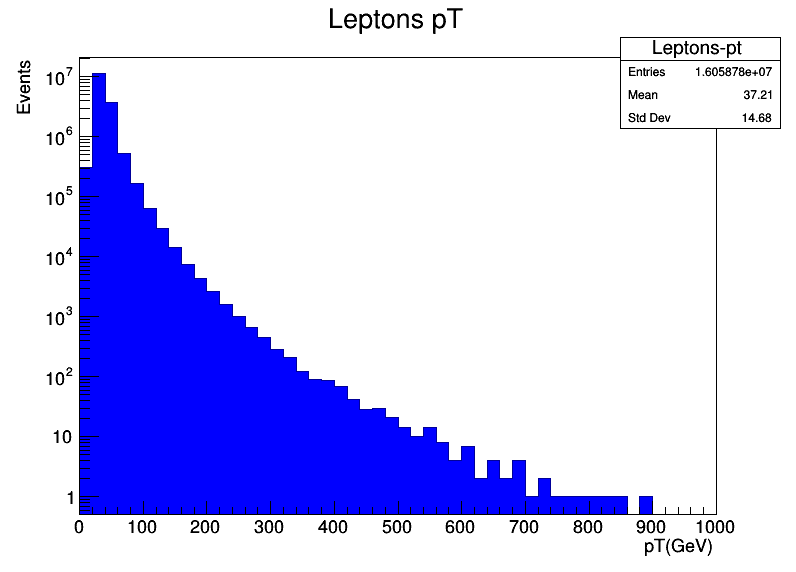

In [7]:
hist_lepton_pt.SetFillColor(4);
hist_lepton_pt.Draw();
canvas.SetLogy();
canvas.Draw();
canvas.Print("hist_lepton_pt.pdf");

Info in <TCanvas::Print>: pdf file hist_lepton_ptcone30.pdf has been created


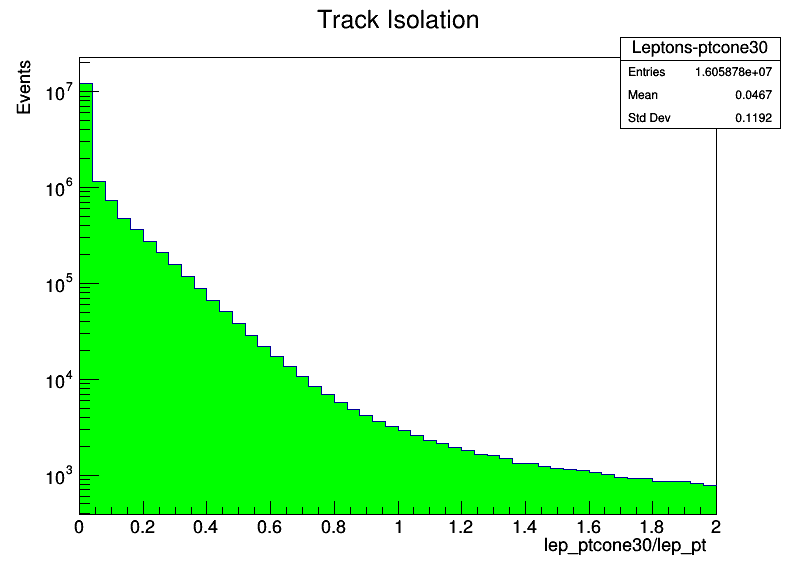

In [8]:
hist_lepton_ptcone30.SetFillColor(3);
hist_lepton_ptcone30.Draw();
canvas.Draw();
canvas.Print("hist_lepton_ptcone30.pdf");

Info in <TCanvas::Print>: pdf file hist_lepton_etcone20.pdf has been created


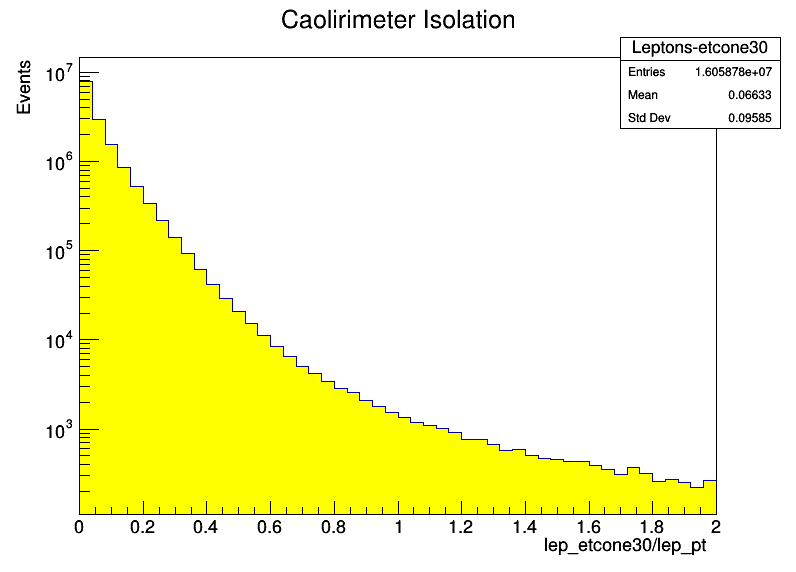

In [9]:
hist_lepton_etcone20.SetFillColor(5);
hist_lepton_etcone20.Draw();
canvas.Draw();
canvas.Print("hist_lepton_etcone20.pdf");

Info in <TCanvas::Print>: pdf file hist_lepton_eta.pdf has been created


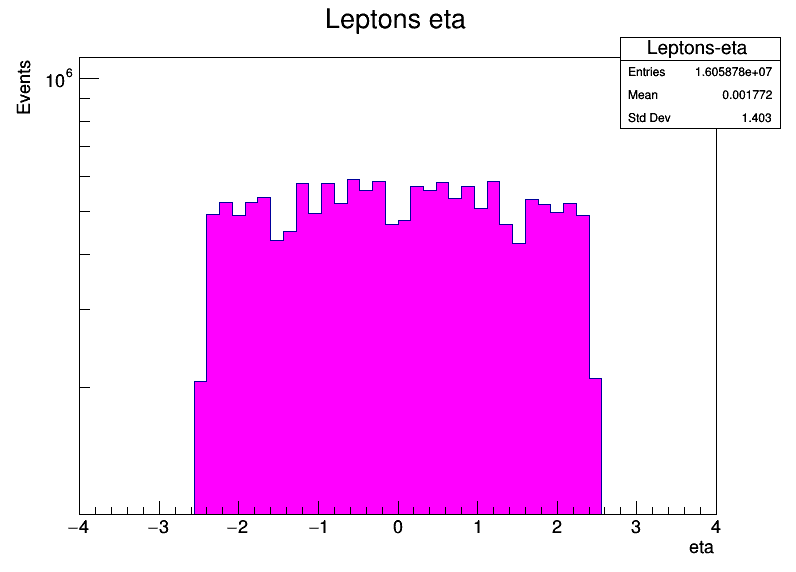

In [10]:
hist_lepton_eta.SetFillColor(6);
hist_lepton_eta.Draw();
canvas.Draw();
canvas.Print("hist_lepton_eta.pdf");

2.   For jets we will also create and fill histograms for:
* Number of jets
* Transverse momentum $p_{T}$:
* *Pseudorapidity* $\eta$ 
* Jet Vertex Fraction (JVF)
* MV1 Output
* Number of b-jets (This will be possible to plot just after make the selection and count of the b-jets in the cutflow, specifically before the sixth cut).

In [11]:
#create histograms:
hist_njets=ROOT.TH1F("njets","Histogram of the number of jets; Number of jets; Events",15,0,15)
hist_jets_pt=ROOT.TH1F("jets_pt","Jets pT; pT(GeV); Events",50,0,1000)
hist_jets_eta=ROOT.TH1F("jets_eta","Jets eta; eta; Events",50,-4,4)
hist_jets_jvf=ROOT.TH1F("jets_jvf","Jets JVF; JVF; Events",50,-1,1)
hist_jets_mv1=ROOT.TH1F("jets_mv1","Jets MV1; MV1; Events",50,0,1)
hist_nbjets=ROOT.TH1F("nbjets","Histogram of the number of b-jets; Number of b-jets; Events",15,0,15)

In [12]:
#Loop and fill the histograms:
for event in tree:
  hist_njets.Fill(tree.jet_n)
  for i in range(0,tree.jet_n):
    hist_jets_pt.Fill(tree.jet_pt[i]/1000);
    hist_jets_eta.Fill(tree.jet_eta[i]);
    hist_jets_jvf.Fill(tree.jet_jvf[i]);
    hist_jets_mv1.Fill(tree.jet_MV1[i]);

Info in <TCanvas::Print>: pdf file hist_njets.pdf has been created


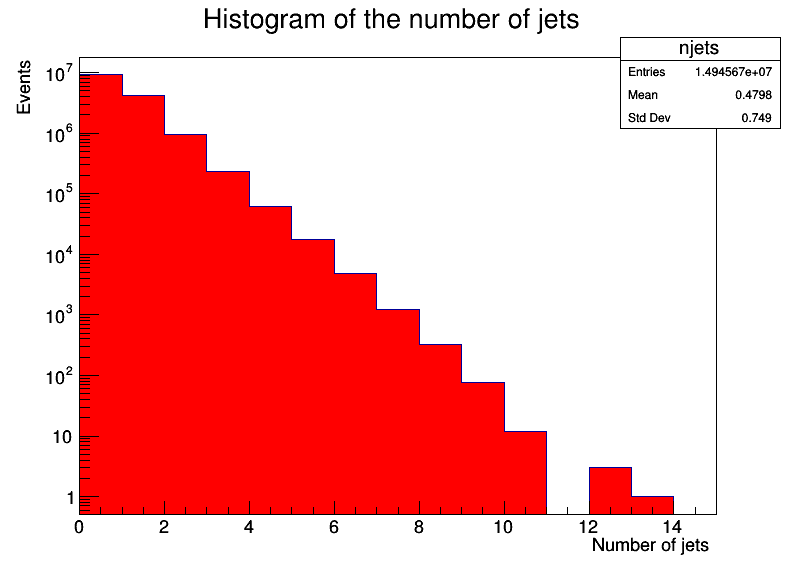

In [13]:
hist_njets.SetFillColor(2);
hist_njets.Draw();
canvas.Draw();
canvas.Print("hist_njets.pdf");

Info in <TCanvas::Print>: pdf file hist_jets_pt.pdf has been created


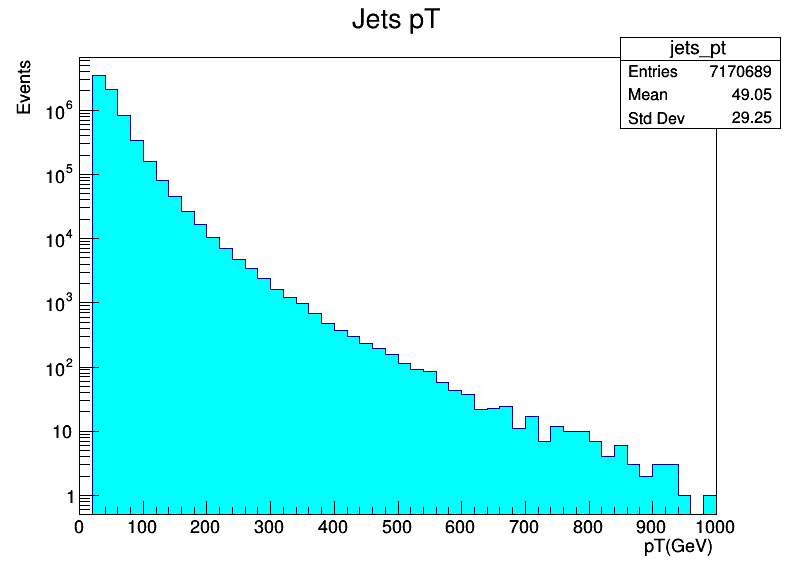

In [14]:
hist_jets_pt.SetFillColor(7);
hist_jets_pt.Draw();
canvas.Draw();
canvas.Print("hist_jets_pt.pdf");

Info in <TCanvas::Print>: pdf file hist_jets_eta.pdf has been created


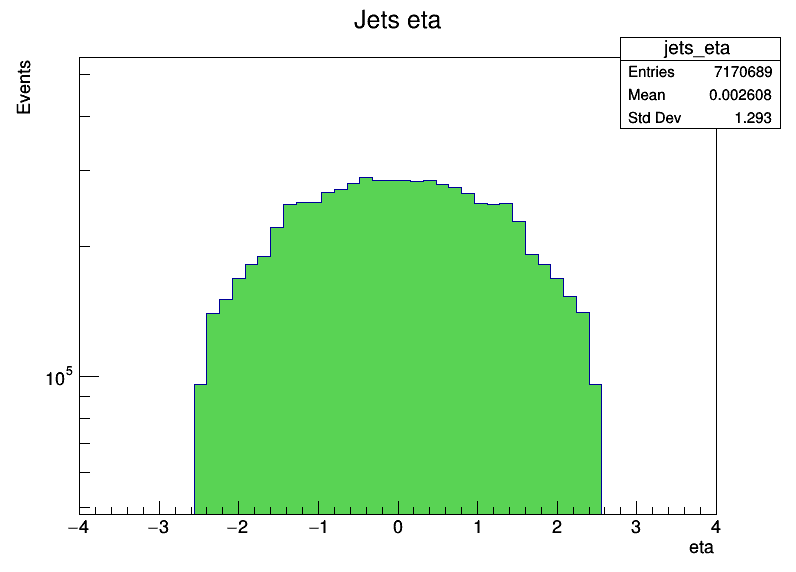

In [15]:
hist_jets_eta.SetFillColor(8);
hist_jets_eta.Draw();
canvas.Draw();
canvas.Print("hist_jets_eta.pdf");

Info in <TCanvas::Print>: pdf file hist_jets_jvf.pdf has been created


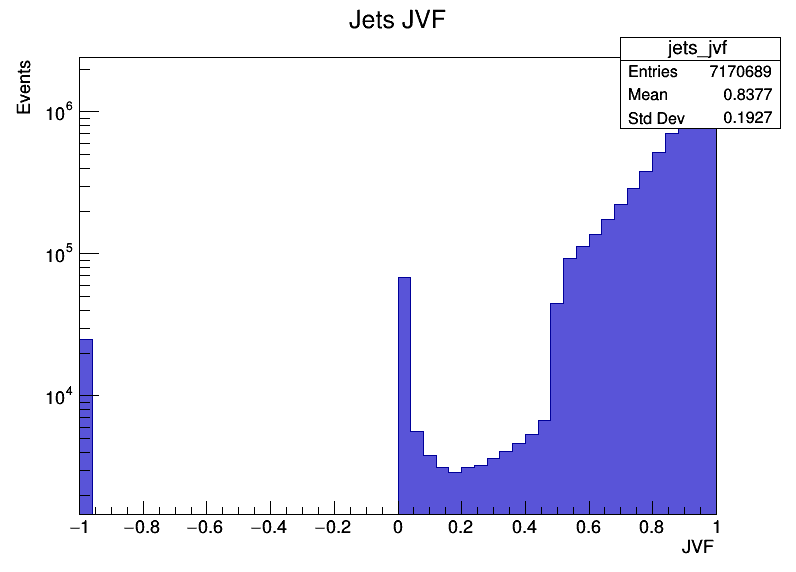

In [16]:
hist_jets_jvf.SetFillColor(9);
hist_jets_jvf.Draw();
canvas.Draw();
canvas.Print("hist_jets_jvf.pdf");

Info in <TCanvas::Print>: pdf file hist_jets_mv1.pdf has been created


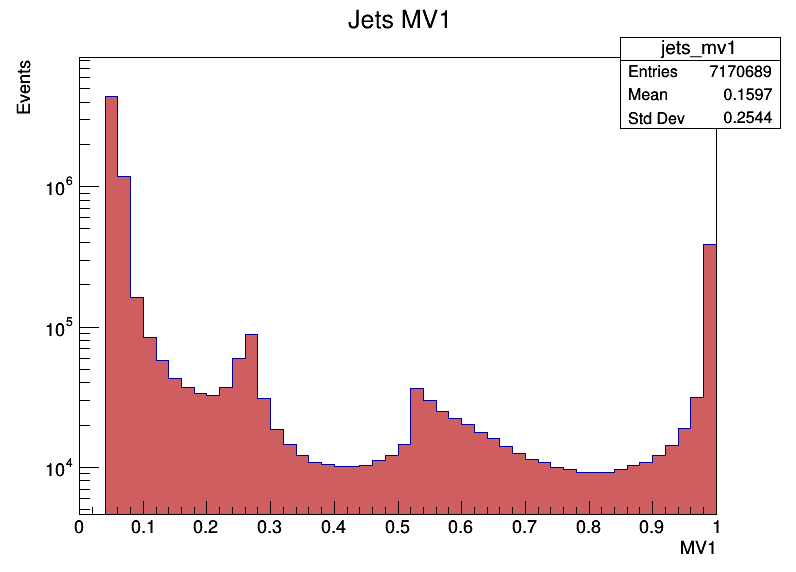

In [17]:
hist_jets_mv1.SetFillColor(46);
hist_jets_mv1.Draw();
canvas.Draw();
canvas.Print("hist_jets_mv1.pdf");

3. For the Missing Transverse Energy (ME$_{T}$) which can be interpreted as neutrinos or other non-interacting particles.

In [18]:
#Create the histogram
hist_met=ROOT.TH1F("met","Missing Transverse Energy MET; MET (GeV); Events",50,0,250)

In [19]:
#Fill the histogram
for event in tree:
  hist_met.Fill(tree.met_et/1000)

print("Done!")

Done!


In [20]:
canvas.SetLogy(0)

Info in <TCanvas::Print>: pdf file hist_MET.pdf has been created


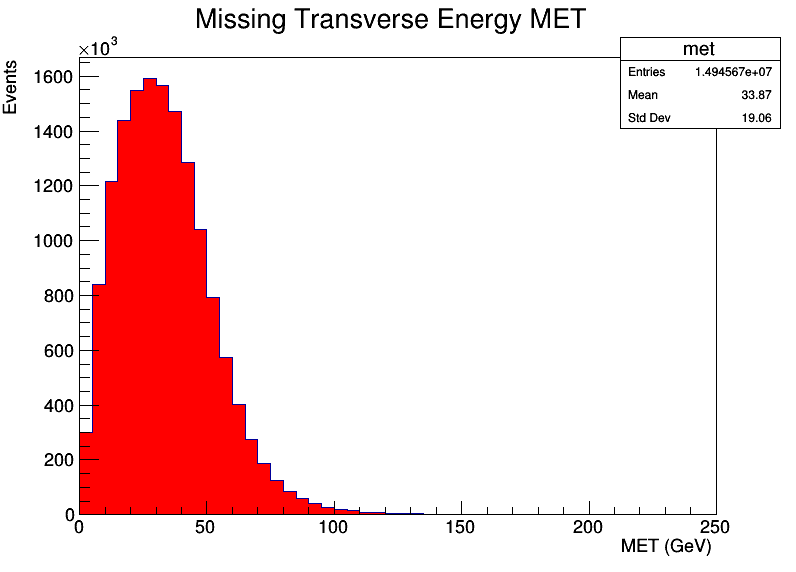

In [21]:
hist_met.SetFillColor(2);
hist_met.Draw();
canvas.Draw();
canvas.Print("hist_MET.pdf");

4. For the transverse mass of W boson $m_{T}(W)$ is only possible after the definition of this variable in terms of 4-vectors for leptons and MET, hence it will be made during the cutflow, specifically just before the eighth cut. 

In [22]:
#Create the histogram just for now:
hist_mtw=ROOT.TH1F("mtw","Transverse mass of W boson; mTW (GeV); Events",50,0,250)

Now we create histograms for the cutflows:

In [23]:
cutflow=ROOT.TH1F("Cutflow","Cutflow; Cut; Events",10,0,10)

Loop and fill histograms

In [24]:
cut1=0;
cut2=0;
cut3=0;
cut4=0;
cut5=0;
cut6=0;
cut7=0;
cut8=0;


for event in tree:
  #First cut: Good vertex
  if not tree.hasGoodVertex:
    continue
  cut1+=1;
  cutflow.Fill(1);

  #Second cut: Trigger
  if not tree.trigE and not tree.trigM:
    continue
  cut2+=1;
  cutflow.Fill(2); 

  # Preselection of good leptons and loop over leptons:
  n_mu=0;
  n_el=0;
  n_lep=0;

  for i in range(0,tree.lep_n):
    if tree.lep_pt[i]<25000.:
      continue
    if tree.lep_ptcone30[i]/tree.lep_pt[i]>0.15:
      continue
    if tree.lep_type[i]==13 and abs(tree.lep_eta[i])<2.5:
      n_mu+=1;
    if tree.lep_type[i]==11 and abs(tree.lep_eta[i])<2.47 and (abs(tree.lep_eta[i])<1.37 or abs(tree.lep_eta[i])>1.52):
      n_el+=1;
    n_lep+=1;
  
  #Select events with only 1 good lepton and fill the cutflow histogram

  #Third cut (one good lepton)
  if n_lep!=1:
    continue
  cutflow.Fill(3);
  cut3+=1;

  n_jets=0;
  n_bjets=0;
  
  #Number of jets distribution
  hist_njets.Fill(tree.jet_n,tree.mcWeight)

  #Fourth cut: At least 4 jets
  if tree.jet_n<4:
    continue
  cutflow.Fill(4);
  cut4+=1;

  for j in range(0,tree.jet_n):
    if tree.jet_pt[j]<25000.:
      continue 
    #To complete: apply jet cuts to find the good jets
    if abs(tree.jet_eta[j])>2.5:
      continue
    if tree.jet_pt[j]<50000. and abs(tree.jet_eta[j])<2.4:
      if tree.jet_jvf[j]<0.5:
        continue
    n_jets+=1;
    #And at least two b-jets:
    if tree.jet_MV1[j]<0.7892:
      continue
    n_bjets+=1;

  #Fifth cut: At least 4 good jets
  if n_jets<4:
    continue
  cutflow.Fill(5);
  cut5+=1;

  #Sixth cut: at least one b-jet
  hist_nbjets.Fill(n_bjets);

  if n_bjets<2:
    continue
  cutflow.Fill(6);
  cut6+=1;

  #Seventh cut: MET > 30 GeV
  if tree.met_et<30000.:
    continue
  cutflow.Fill(7);
  cut7+=1;

  #TLorentzVector definitions
  Lepton=ROOT.TLorentzVector();
  Lepton.SetPtEtaPhiE(tree.lep_pt[i],tree.lep_eta[i],tree.lep_phi[i],tree.lep_E[i]);
  MeT=ROOT.TLorentzVector();
  MeT.SetPtEtaPhiE(tree.met_et,0,tree.met_phi,tree.met_et)
    

  #Calculation of the mTW using TLorentz vectors             
  mTW=math.sqrt(2*Lepton.Pt()*MeT.Et()*(1-math.cos(Lepton.DeltaPhi(MeT))));

  #Eighth cut:
  hist_mtw.Fill(mTW/1000); 
  if mTW<30000:
    continue
  cutflow.Fill(8);
  cut8+=1;


print("All done.")
print('All events:',tree.GetEntries())
print('cut1=',cut1)
print('cut2=',cut2)
print('cut3=',cut3)
print('cut4=',cut4)
print('cut5=',cut5)
print('cut6=',cut6)
print('cut7=',cut7)
print('cut8=',cut8)

All done.
All events: 14945674
cut1= 14656440
cut2= 14656440
cut3= 12442937
cut4= 68196
cut5= 67847
cut6= 11125
cut7= 8741
cut8= 7211


Ploting the histograms for the transverse mass of W boson and the number of b-jets:

Info in <TCanvas::Print>: pdf file hist_mtw.pdf has been created


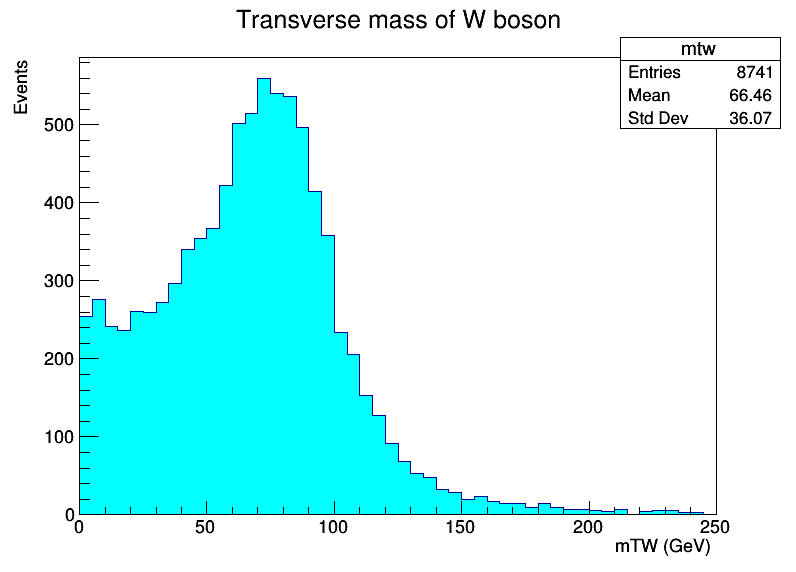

In [25]:
 hist_mtw.SetFillColor(7);
 hist_mtw.Draw();
 canvas.Draw();
 canvas.Print("hist_mtw.pdf");

Info in <TCanvas::Print>: pdf file hist_nbjets.pdf has been created


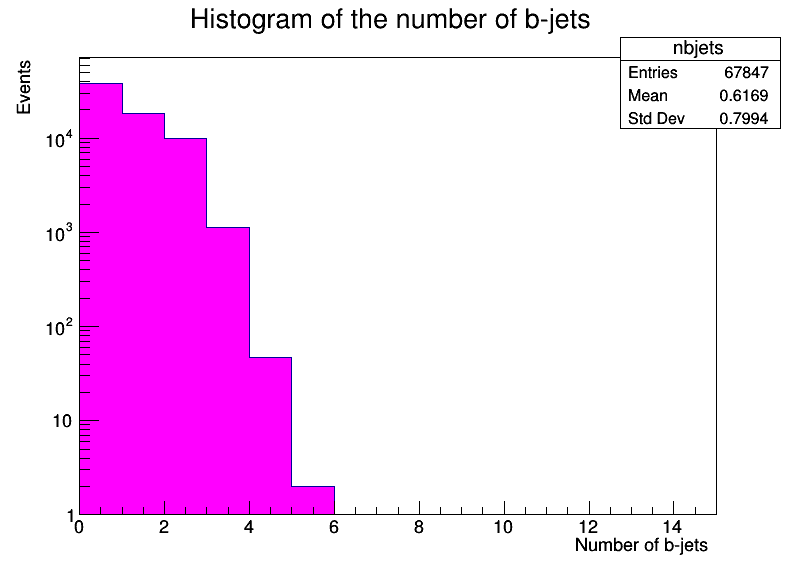

In [26]:
 hist_nbjets.SetFillColor(6);
 hist_nbjets.Draw();
 canvas.SetLogy(1);
 canvas.Draw();
 canvas.Print("hist_nbjets.pdf");

And finally, plotting the cutflow:

Info in <TCanvas::Print>: pdf file cutflow.pdf has been created


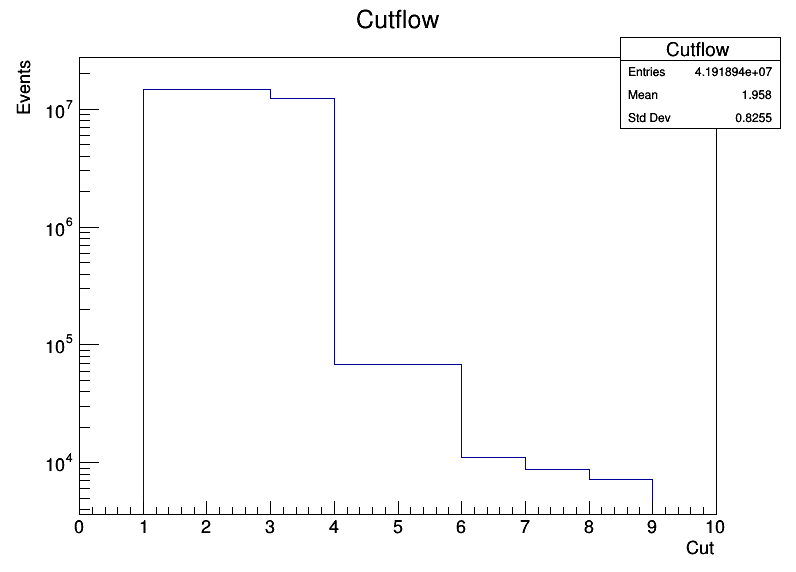

In [27]:
cutflow.Draw();
canvas.Draw();
canvas.Print("cutflow.pdf");